In [2]:
import numpy as np
import pandas as pd
%pip install matplotlib
import matplotlib.pyplot as plt

%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('./data.csv')

In [4]:
data.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


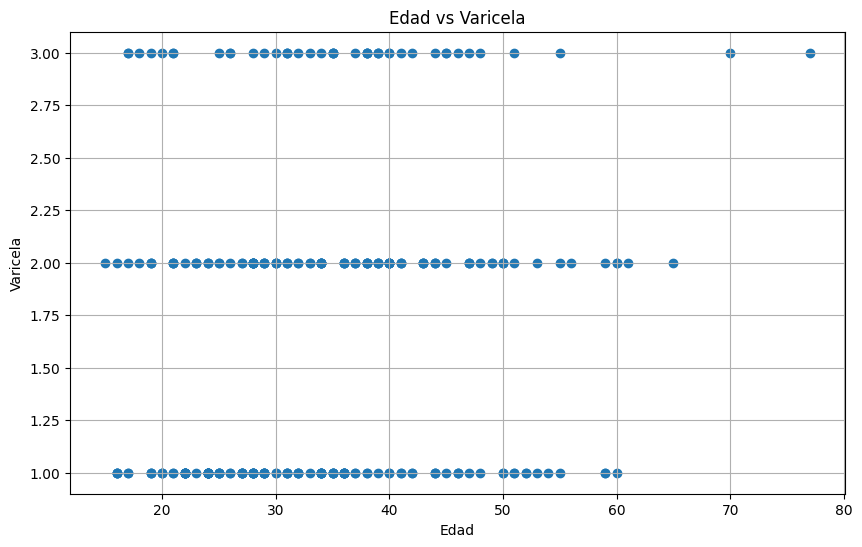

In [5]:
#edad vs varicela
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Varicella'])
plt.xlabel('Edad')
plt.ylabel('Varicela')
plt.title('Edad vs Varicela')
plt.grid(True)
plt.show()



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [7]:
data[data.columns] = data[data.columns].astype('Int64')

In [8]:
df = data.copy()

In [9]:
gender = {1:'Male', 2: 'Female'}
breastfeeding = {1: 'yes', 2:'no', 3:'unknown'}
varicella = {1 : 'positive', 2: 'negative', 3: 'unknown'}
group = {1: 'CDMS' , 0: 'Non-CDMS' }

In [10]:
data['Gender'] = data['Gender'].map(gender)
data['Breastfeeding'] = data['Breastfeeding'].map(breastfeeding)
data['Varicella'] = data['Varicella'].map(varicella)
data['group'] = data['group'].map(group)

#con .map, estamos cambiando los valores de las columnas por los valores que le asignamos en los diccionarios

In [11]:
print (data.columns)

Index(['Unnamed: 0', 'Gender', 'Age', 'Schooling', 'Breastfeeding',
       'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic',
       'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP',
       'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI',
       'Spinal_Cord_MRI', 'Initial_EDSS', 'Final_EDSS', 'group'],
      dtype='object')


In [12]:
data = data.drop('Unnamed: 0', axis=1)
data.head(6)

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,Male,34,20,yes,positive,2,1,0,1,1,0,0,0,1,0,1,1,1,CDMS
1,Male,61,25,unknown,negative,10,2,1,1,0,1,0,0,0,0,1,2,2,CDMS
2,Male,22,20,unknown,positive,3,1,1,0,0,0,0,0,1,0,0,1,1,CDMS
3,Female,41,15,yes,positive,7,2,1,0,1,1,0,1,1,0,0,1,1,CDMS
4,Female,34,20,no,positive,6,2,0,1,0,0,0,1,0,0,0,1,1,CDMS
5,Male,29,22,yes,positive,6,2,0,1,0,0,0,1,0,1,0,1,1,CDMS


In [13]:
#transformo en numerico las columnas que son categoricas, en 0 y 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["Varicella"] = le.fit_transform(data["Varicella"])
data["Breastfeeding"] = le.fit_transform(data["Breastfeeding"])
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

data.head(6)


,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,34,20,2,1,2,1,0,1,1,0,0,0,1,0,1,1,1,CDMS
1,0,61,25,1,0,10,2,1,1,0,1,0,0,0,0,1,2,2,CDMS
2,0,22,20,1,1,3,1,1,0,0,0,0,0,1,0,0,1,1,CDMS
3,1,41,15,2,1,7,2,1,0,1,1,0,1,1,0,0,1,1,CDMS
4,1,34,20,0,1,6,2,0,1,0,0,0,1,0,0,0,1,1,CDMS
5,0,29,22,2,1,6,2,0,1,0,0,0,1,0,1,0,1,1,CDMS


In [14]:
# def count_plot(data, feature, title, hue=True): 
#     plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
#     total = float(len(data))
#     if hue:
#         ax = sns.countplot(x=data[feature], hue=data['group'] , palette='rainbow')
        
#     else:
#         ax = sns.countplot(x=data[feature], hue=None, palette='rainbow')
    
#     ax.set_facecolor('#F6F5F4')

#     for p in ax.patches:

#         height = p.get_height()
#         ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
#                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

#     ax.set_title(title, fontsize=16, y=1.05)
#     sns.despine(right=True)
#     sns.despine(offset=5, trim=True)

In [15]:
# count_plot(data, 'group', 'both genders - gender', hue=False)

In [16]:
data.groupby(['Gender', 'group'] )['group'].count()

Gender  group
0       CDMS     64
1       CDMS     61
Name: group, dtype: int64

In [17]:
# data.groupby(['Periventricular_MRI', 'Infratentorial_MRI', 'Cortical_MRI', 'Spinal_Cord_MRI'])['group']\
#     .value_counts(normalize=True).mul(100).to_frame(name='Percent within group (%)')\
#     .style.background_gradient(cmap='Blues')

In [18]:
total = len(data)

# Calculo cuanto tiene cada categoria
num_male = (data['Gender'] == 0).sum()
num_female = (data['Gender'] == 1).sum()
num_unknown = total - num_male - num_female

# porcentajes
percent_male = (num_male / total) * 100
percent_female = (num_female / total) * 100
percent_unknown = (num_unknown / total) * 100

In [19]:
print(f"Porcentaje de hombres: {percent_male:.2f}%")
print(f"Porcentaje de mujeres: {percent_female:.2f}%")
print(f"Porcentaje de desconocido: {percent_unknown:.2f}%")

Porcentaje de hombres: 38.46%
Porcentaje de mujeres: 61.54%
Porcentaje de desconocido: 0.00%


In [20]:
data["group"] = le.fit_transform(data["group"])
data["group"] = 1 - data["group"]
data

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,34,20,2,1,2,1,0,1,1,0,0,0,1,0,1,1,1,1
1,0,61,25,1,0,10,2,1,1,0,1,0,0,0,0,1,2,2,1
2,0,22,20,1,1,3,1,1,0,0,0,0,0,1,0,0,1,1,1
3,1,41,15,2,1,7,2,1,0,1,1,0,1,1,0,0,1,1,1
4,1,34,20,0,1,6,2,0,1,0,0,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,1,31,8,1,1,9,2,0,0,0,0,0,0,0,0,0,<NA>,<NA>,0
269,0,21,15,1,2,5,2,1,0,0,0,0,0,0,0,1,<NA>,<NA>,0
270,1,19,12,1,2,13,2,0,1,1,1,0,0,0,0,1,<NA>,<NA>,0
271,1,32,15,1,2,15,2,1,1,1,1,0,1,1,1,0,<NA>,<NA>,0


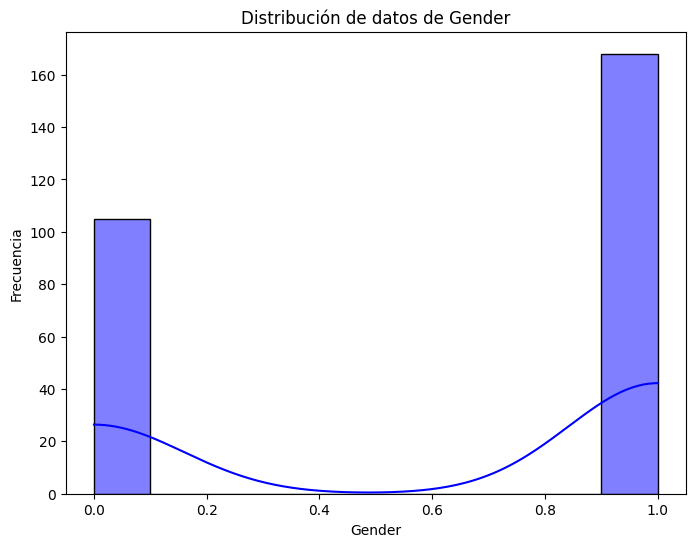

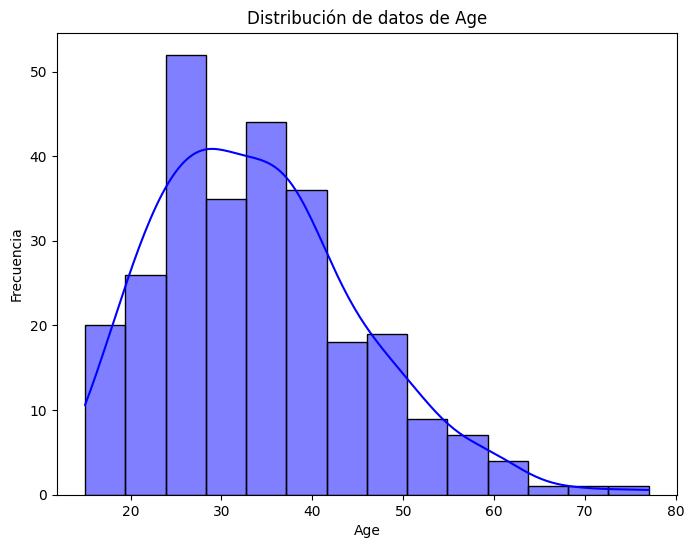

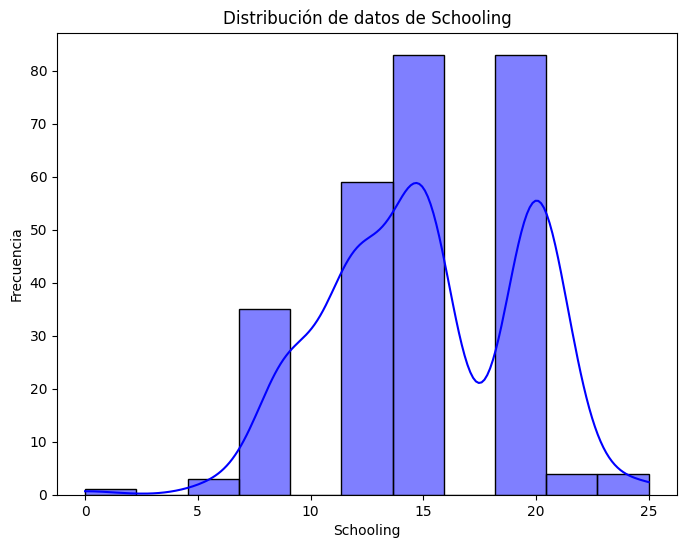

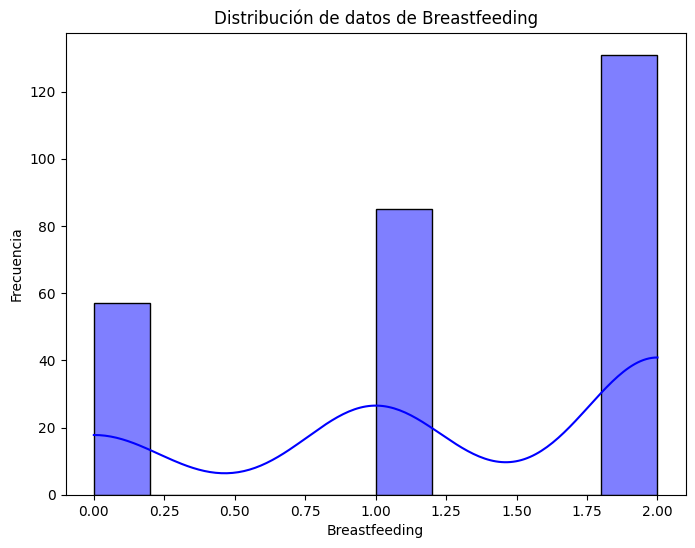

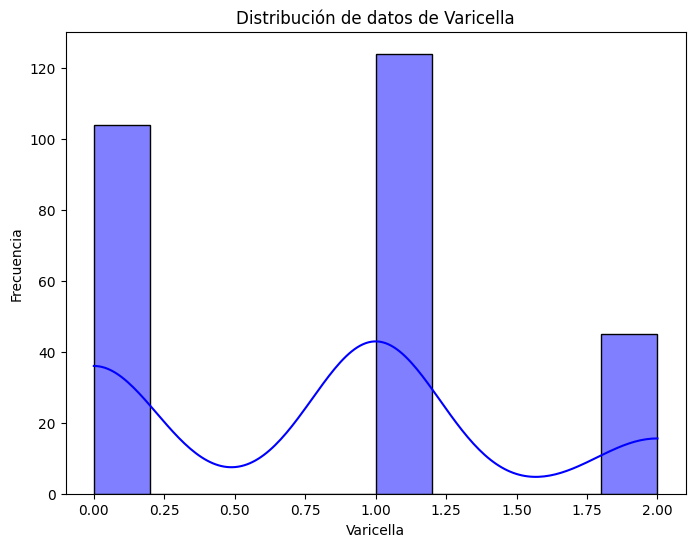

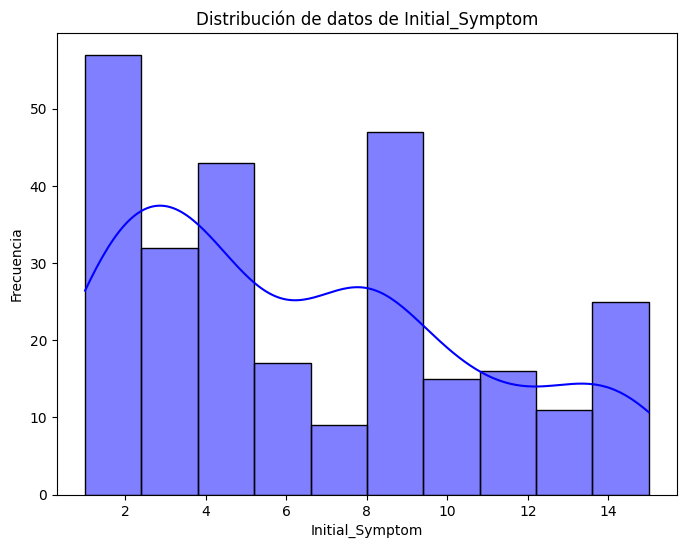

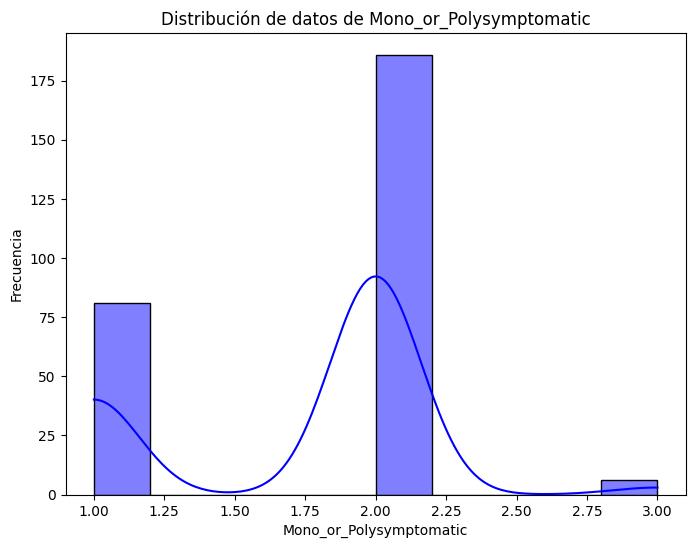

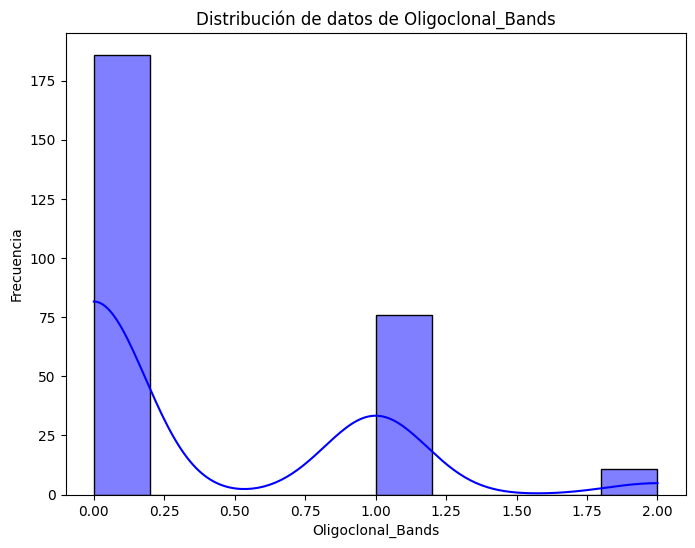

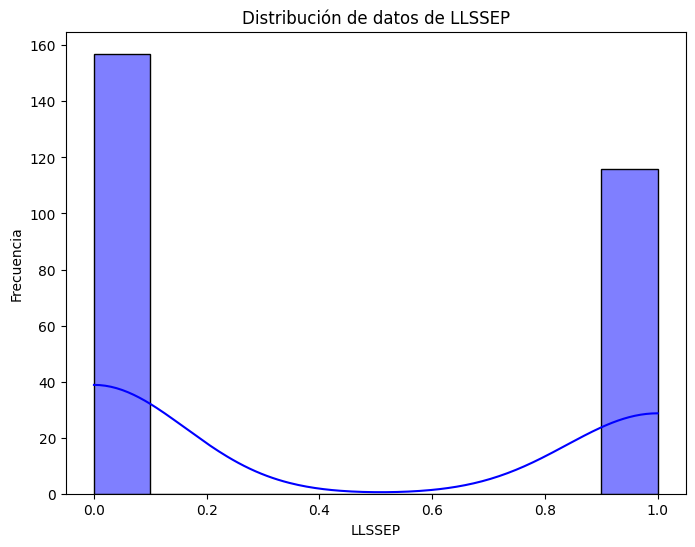

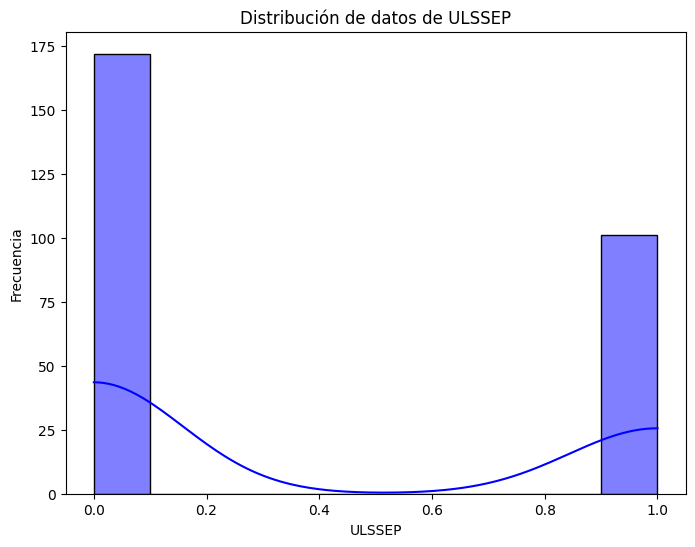

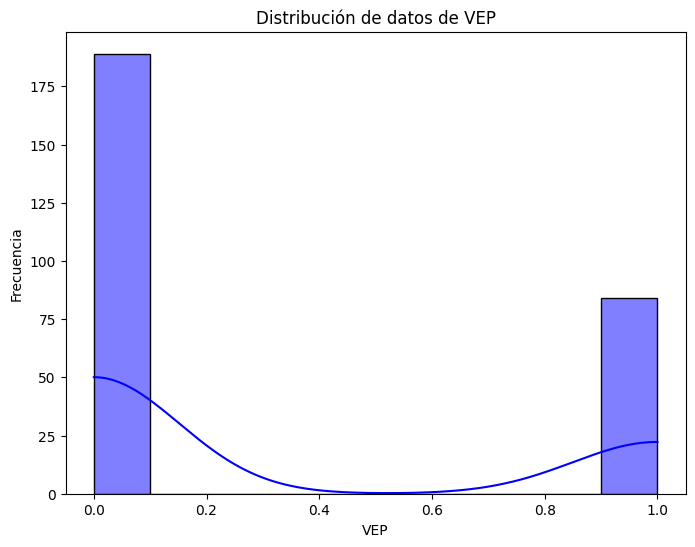

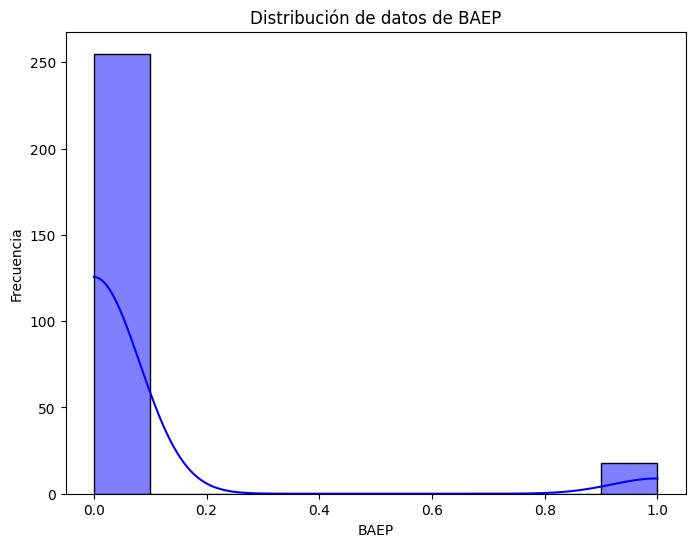

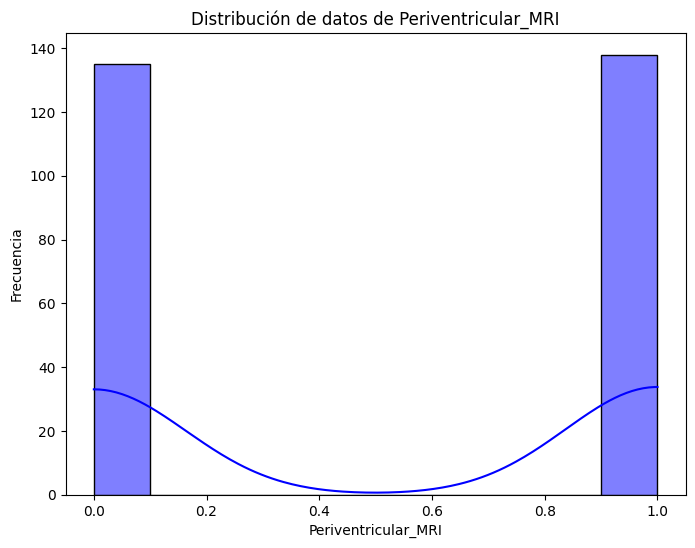

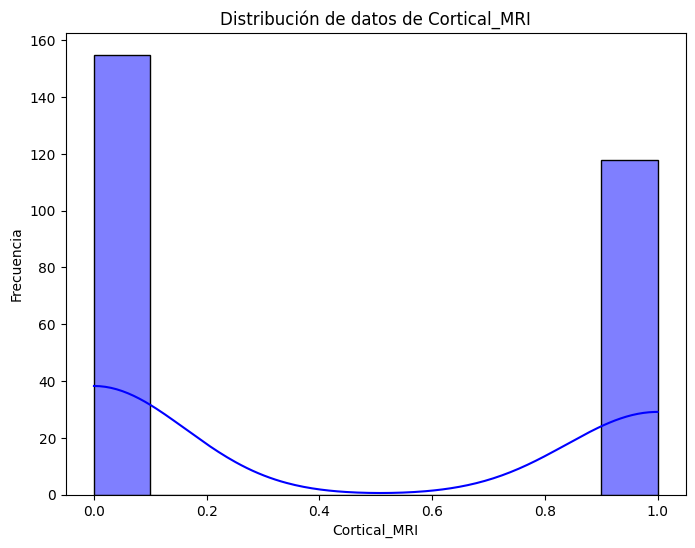

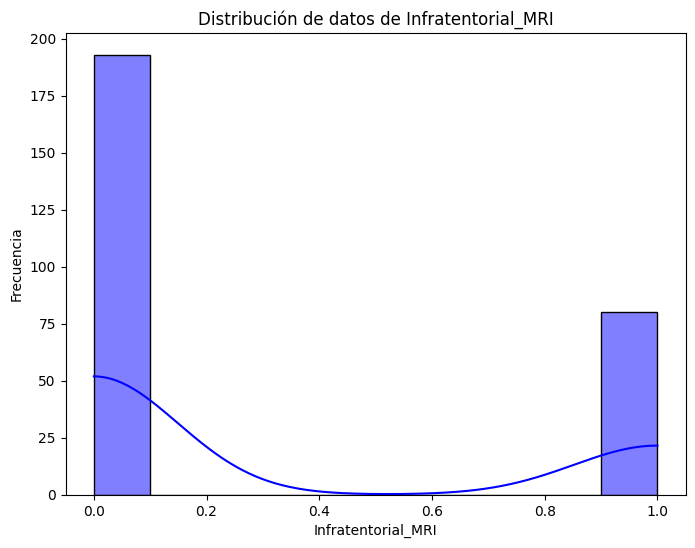

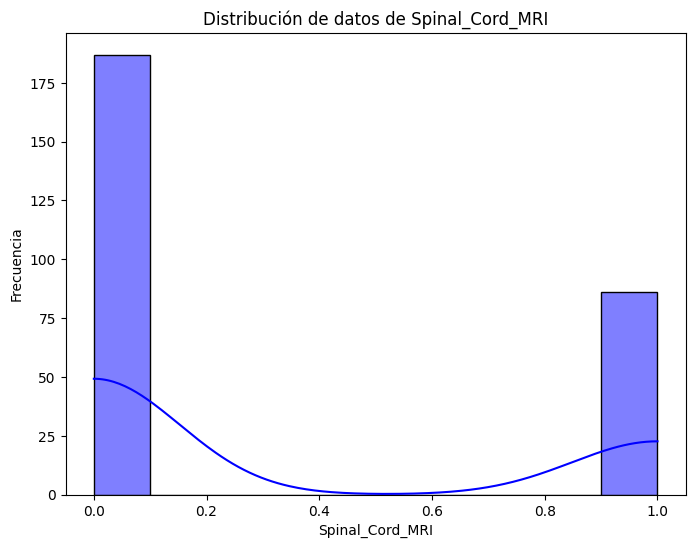

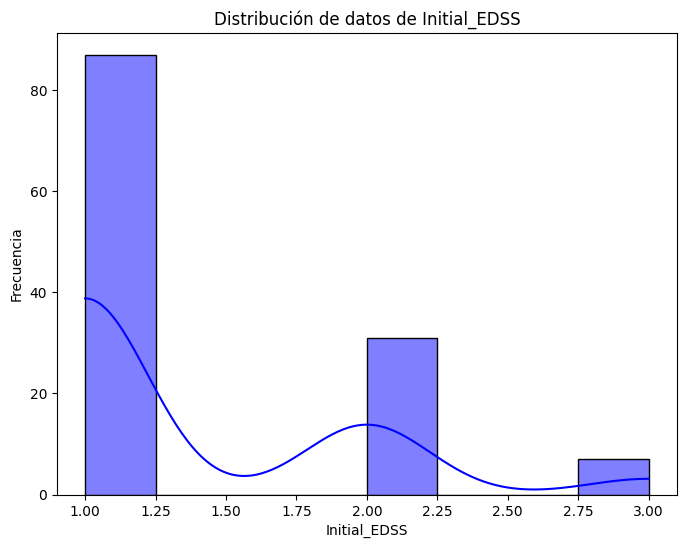

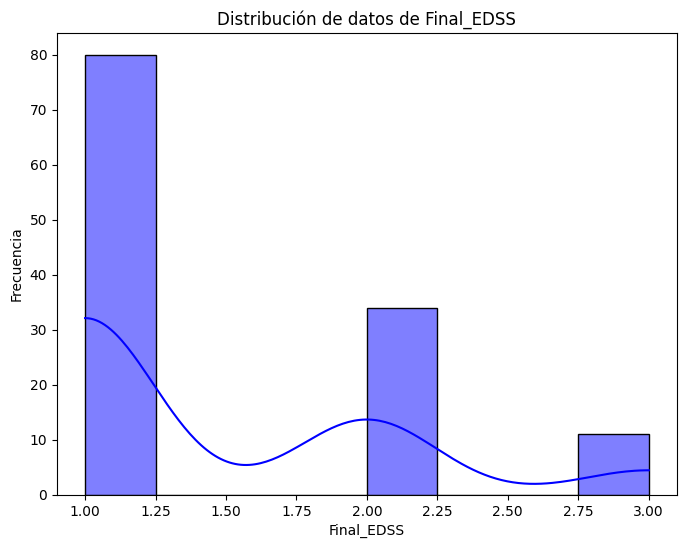

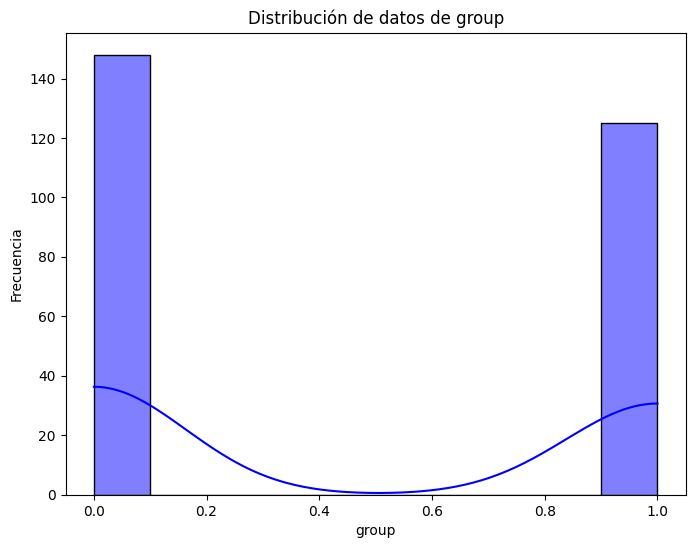

In [21]:
#hisogramas para visualizar la distribucion de los datos de todas las columnas del dataset
columnas = data.select_dtypes(include=['int64', 'float64']).columns


for a in columnas:
   plt.figure(figsize=(8, 6))
   sns.histplot(data[a], kde=True, color='blue')
   plt.title(f'Distribución de datos de {a}')
   plt.xlabel(a)
   plt.ylabel('Frecuencia')
   plt.show()

/var/folders/h1/j3hlf_9d2wv_fdvmlsz9t0_m0000gn/T/ipykernel_68029/1701104213.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_group.values, y=correlations_with_group.index, palette='viridis')


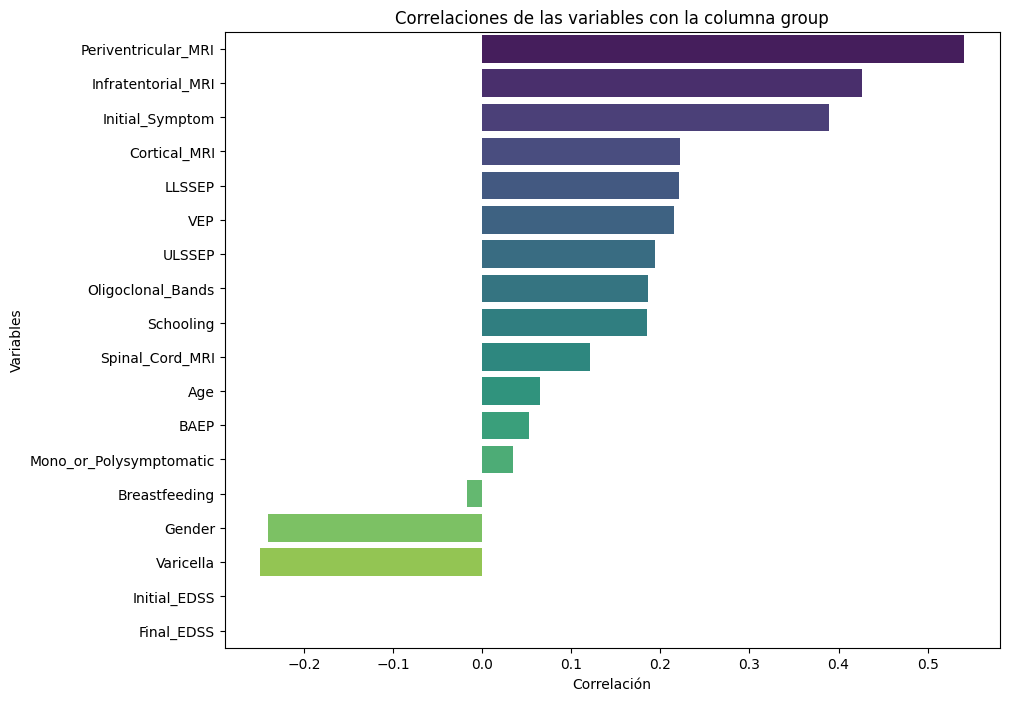

In [22]:
# Calcular la matriz de correlación
matriz_de_correlacion = data.corr()

correlations_with_group = matriz_de_correlacion['group'].drop('group').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlations_with_group.values, y=correlations_with_group.index, palette='viridis')
plt.title('Correlaciones de las variables con la columna group')
plt.xlabel('Correlación')
plt.ylabel('Variables')
plt.show()

In [23]:
#1ER MODELO DE REGRESION LOGISTICA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
X = data.drop('group', axis=1)
y = data['group']

In [25]:
# Dividir los datos en conjuntos de entrenamiento (60%), validación (20%) y prueba (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [26]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Entrenar un modelo de clasificación (Random Forest en este caso)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Validar el modelo
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Precisión en el conjunto de validación:s {val_accuracy:.2f}')
print('Reporte de clasificación en el conjunto de validación:')
print(classification_report(y_val, y_val_pred))

# Evaluar el modelo en el conjunto de prueba
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Precisión en el conjunto de prueba: {test_accuracy:.2f}')
print('Reporte de clasificación en el conjunto de prueba:')
print('Matriz de confusión en el conjunto de validación:')
print(confusion_matrix(y_val, y_val_pred))

Precisión en el conjunto de validación:s 1.00
Reporte de clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

Precisión en el conjunto de prueba: 1.00
Reporte de clasificación en el conjunto de prueba:
Matriz de confusión en el conjunto de validación:
[[30  0]
 [ 0 25]]


In [28]:
# Validación cruzada
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f'Precisión media de validación cruzada: {cross_val_scores.mean():.2f}')
cross_val_predictions = cross_val_predict(model, X, y, cv=5)
print('Reporte de clasificación de validación cruzada:')
print(classification_report(y, cross_val_predictions))
print('Matriz de confusión de validación cruzada:')
print(confusion_matrix(y, cross_val_predictions))

Precisión media de validación cruzada: 1.00
Reporte de clasificación de validación cruzada:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       125

    accuracy                           1.00       273
   macro avg       1.00      1.00      1.00       273
weighted avg       1.00      1.00      1.00       273

Matriz de confusión de validación cruzada:
[[148   0]
 [  0 125]]


In [29]:
data = data.drop('Final_EDSS', axis=1)
data.head(300)


,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,group
0,0,34,20,2,1,2,1,0,1,1,0,0,0,1,0,1,1,1
1,0,61,25,1,0,10,2,1,1,0,1,0,0,0,0,1,2,1
2,0,22,20,1,1,3,1,1,0,0,0,0,0,1,0,0,1,1
3,1,41,15,2,1,7,2,1,0,1,1,0,1,1,0,0,1,1
4,1,34,20,0,1,6,2,0,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,1,31,8,1,1,9,2,0,0,0,0,0,0,0,0,0,<NA>,0
269,0,21,15,1,2,5,2,1,0,0,0,0,0,0,0,1,<NA>,0
270,1,19,12,1,2,13,2,0,1,1,1,0,0,0,0,1,<NA>,0
271,1,32,15,1,2,15,2,1,1,1,1,0,1,1,1,0,<NA>,0
